A portfolio manager is attempting to assess risk from an investment.  
1. The initial investment $M$ is uniformly distributed on [.5,1.5] (in *millons of dollars*)
2. The annual interest rate $r$ is uniformly distributed between 2 and 4 percent.


### Solve using spectral expansions:
* Expand using a 5 term expansion $(K=4)$ for both the initial investment and the interest rate. Remember, you have to expand both $M$ and $r$ as Legendre polynomials on [-1,1].


### Solve using spectral collocation
* Use collocation (with Lagrange polynomials) at the 5 *Chebyshev* points for each variable(use a tensor product grid) to solve this problem.

### Using the solutions
1. What is the expected value of the investment after 1 year?  The variance?
2. Use both method to compute the probability that there is less than a million dollars in the account after 1 year.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import sympy.functions.special.polynomials as spp
import scipy.integrate as spi

### Responses

The initial value problem is: $\frac{dM}{dt} = M(t, \omega_1)r(t, \omega_2), \; M(0, \omega_1) = \bar{M}$. The initial investment and the interest rate are uniformly distributed random variables: $M \sim \mathcal{U}[0.5, 1.5], \quad r \sim \mathcal{U}[0.02, 0.04]$, with

$$\mu_M = 1, \quad \sigma_M^2 = \frac{1}{12}$$

$$\mu_r = 0.03, \quad \sigma_r^2 = 3.33 \times 10^{-5}$$

Using the results of Exercise 4.6 and Example 10.5, the random variables can be expressed as:

$$M^N = \mu_M + \big(\sqrt{3}\sigma_M\big)(Q_1) = 1 + \frac{1}{2}Q_1$$

$$r^N = \mu_r + \big(\sqrt{3}\sigma_r\big)(Q_2) = 0.03 + 0.01Q_2,$$

making the analytical solution: $$M(t, Q) = \bigg(1 + \frac{1}{2}Q_1\bigg)e^{(0.03 + 0.01Q_2)t},$$ 

where $Q_1, Q_2 \sim \mathcal{U}[-1, 1]$, with $\rho_Q = \frac{1}{2}$.

We compute the exact mean and variance of $M(t, Q)$. First, to compute the mean, observe that we have a product of functions of independent random variables. Therefore, we can write:

$$\mathbb{E}[M(t, Q)] = \mathbb{E}\big[\big(1 + \frac{1}{2}Q_1\big)\big(\text{exp}(0.03t + 0.01Q_2t)\big)\big] \overset{ind}{=} \mathbb{E}\big[\big(1 + \frac{1}{2}Q_1\big)\big]\mathbb{E}\big[\big(\text{exp}(0.03t + 0.01Q_2t)\big)\big]$$

The first term in the product is 1 because the expected value of a $\mathcal{U}[-1, 1]$ is 0. The second term is found by:

$$\mathbb{E}\big[\big(\text{exp}(0.03t + 0.01Q_2t)\big)\big] = e^{0.03t}\mathbb{E}\big[\text{exp}(0.01Q_2t)\big]\overset{def}{=} e^{0.03t}\int_{-1}^1 e^{0.01q_1t}f(q_2)dq_2$$

Using substitution with $u = 0.01q_2t$, the solution to this integral, and thus the mean of $M(t, Q)$, is: 

$$\frac{50}{t}\big[e^{\frac{t}{25}} - e^{\frac{t}{50}}\big].$$

The variance can be found by: $var(M) = \mathbb{E}[M^2] - (\mathbb{E}[M])^2$, where $\mathbb{E}[M^2]$ can be computed by squaring the functions in the product, then taking expectation, recognizing again that $Q_1$ and $Q_2$ are independent:

$$\mathbb{E}[M^2] = \mathbb{E}\big[\big(1 + \frac{1}{2}Q_1\big)^2\big(\text{exp}(0.03t + 0.01Q_2t)\big)^2\big] \overset{ind}{=} \mathbb{E}\big[\big(1 + \frac{1}{2}Q_1\big)^2\big]\mathbb{E}\big[\big(\text{exp}(0.03t + 0.01Q_2t)\big)^2\big]$$

The first term in the product is: 

$$\mathbb{E}\big[\big(1 + \frac{1}{2}Q_1\big)^2\big] = \mathbb{E}[1 + Q_1 + \frac{1}{4}Q_1^2] = 1 + \frac{1}{4}\mathbb{E}[Q_1^2],$$

with

$$\mathbb{E}[Q_1^2] = \frac{1}{2}\int_{-1}^1q_1^2dq_1 = \frac{1}{3} \Rightarrow \mathbb{E}[1 + Q_1 + \frac{1}{4}Q_1^2] = \frac{13}{12}.$$

The second term in the product is:

$$\mathbb{E}\big[\big(\text{exp}(0.03t + 0.01Q_2t)\big)^2\big] = e^{0.06t}\mathbb{E}[\text{exp}(0.02Q_2t)],$$

which is computed similarly to that above, but with $u = 0.02q_2t$. The solution is:

$$e^{0.06t}\mathbb{E}[\text{exp}(0.02Q_2t)] = \frac{25}{t}\big(e^{\frac{2t}{25}} - e^{\frac{t}{25}}\big),$$

making the variance:

$$\mathbb{E}[M^2] - (\mathbb{E}[M])^2 = \frac{13}{12}\frac{25}{t}\big(e^{\frac{2t}{25}} - e^{\frac{t}{25}}\big) - \bigg(\frac{50}{t}\bigg)^2\big(e^{\frac{t}{25}} - e^{\frac{t}{50}}\big)^2,$$

which we will not simplify because this is suitable for coding below.

In [2]:
t = np.linspace(1e-3, 2e1, 2e5)

true_mean = (50/t)*(np.exp(t/25) - np.exp(t/50))
true_var = (325/(12*t))*(np.exp((2*t)/25) - np.exp(t/25)) - true_mean**2
plus_2std = true_mean + 2*np.sqrt(true_var)
minus_2std = true_mean - 2*np.sqrt(true_var)
# print(true_mean, true_var)

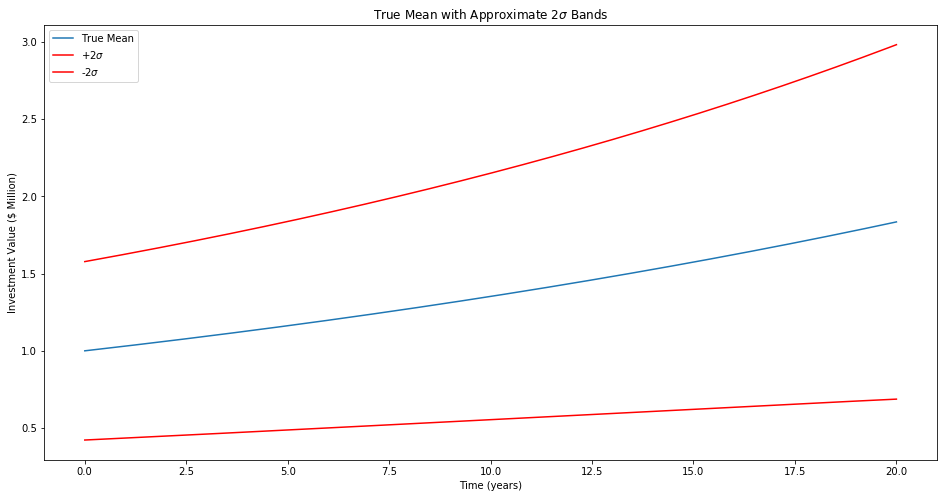

In [3]:
plt.figure(figsize = (16, 8))
plt.plot(t, true_mean, color = 'C0', label = 'True Mean')
plt.plot(t, plus_2std, color = 'r', label = '+2$\sigma$')
plt.plot(t, minus_2std, color = 'r', label = '-2$\sigma$')
plt.legend()
plt.title('True Mean with Approximate 2$\sigma$ Bands')
plt.xlabel('Time (years)')
plt.ylabel('Investment Value ($ Million)')
plt.show()

### Spectral Expansion Solution

We have shown that the analytic solution is: $$M(t, Q) = \bigg(1 + \frac{1}{2}Q_1\bigg)e^{(0.03 + 0.01Q_2)t}.$$ The approximate solution is given by: $$M^K(t, Q) = \sum_{k=0}^K M_k(t)\psi_k(Q) = \sum_{k=0}^K M_0e^{r_kt}\psi_k(Q),$$

where the $\psi_k(Q) = \psi_{k_1}(Q_1)\psi_{k_2}(Q_2)$ are the tensored polynomials for $|\textbf{k}'| = 4$:


| k      |   $\textbf{k}'$    |   Index    |   Polynomial               |
|:------:|:------------------:|:----------:|:--------------------------:|
| 0      | 0                  | (0, 0)     | $\psi_0(Q_1)$$\psi_0(Q_2)$ |
| 1      | 1                  | (1, 0)     | $\psi_1(Q_1)$$\psi_0(Q_2)$ |
| 2      | 1                  | (0, 1)     | $\psi_0(Q_1)$$\psi_1(Q_2)$ |
| 3      | 2                  | (2, 0)     | $\psi_2(Q_1)$$\psi_0(Q_2)$ |
| 4      | 2                  | (1, 1)     | $\psi_1(Q_1)$$\psi_1(Q_2)$ |
| 5      | 2                  | (0, 2)     | $\psi_0(Q_1)$$\psi_2(Q_2)$ |
| 6      | 3                  | (3, 0)     | $\psi_3(Q_1)$$\psi_0(Q_2)$ |
| 7      | 3                  | (2, 1)     | $\psi_2(Q_1)$$\psi_1(Q_2)$ |
| 8      | 3                  | (1, 2)     | $\psi_1(Q_1)$$\psi_2(Q_2)$ |
| 9      | 3                  | (0, 3)     | $\psi_0(Q_1)$$\psi_3(Q_2)$ |
| 10     | 4                  | (4, 0)     | $\psi_4(Q_1)$$\psi_0(Q_2)$ |
| 11     | 4                  | (3, 1)     | $\psi_3(Q_1)$$\psi_1(Q_2)$ |
| 12     | 4                  | (2, 2)     | $\psi_2(Q_1)$$\psi_2(Q_2)$ |
| 13     | 4                  | (1, 3)     | $\psi_1(Q_1)$$\psi_3(Q_2)$ |
| 14     | 4                  | (0, 4)     | $\psi_0(Q_1)$$\psi_4(Q_2)$ |

The first term in the tensored product reflects the Legendre basis for the investment value, and the second term reflects the Legendre basis for the interest rate. The Legendre polynomials and their products are reproduced below.

In [4]:
poly = {} # initialize a dictionary to populate the polynomials; this will be used in computation later

L = 5 # polynomial space index

q1 = sp.symbols('q1'); q2 = sp.symbols('q2')
psiQ1 = [spp.legendre(l, q1) for l in range(L)]; psiQ2 = [spp.legendre(l, q2) for l in range(L)]

t = 0
for l in range(L):
    for i in range(l+1):
        k = l-i
        poly[t] = [psiQ1[k], psiQ2[i]]
        t += 1

In [5]:
print(poly)

{0: [1, 1], 1: [q1, 1], 2: [1, q2], 3: [3*q1**2/2 - 1/2, 1], 4: [q1, q2], 5: [1, 3*q2**2/2 - 1/2], 6: [5*q1**3/2 - 3*q1/2, 1], 7: [3*q1**2/2 - 1/2, q2], 8: [q1, 3*q2**2/2 - 1/2], 9: [1, 5*q2**3/2 - 3*q2/2], 10: [35*q1**4/8 - 15*q1**2/4 + 3/8, 1], 11: [5*q1**3/2 - 3*q1/2, q2], 12: [3*q1**2/2 - 1/2, 3*q2**2/2 - 1/2], 13: [q1, 5*q2**3/2 - 3*q2/2], 14: [1, 35*q2**4/8 - 15*q2**2/4 + 3/8]}


To determine the coefficients, we first rewrite the initial value into a differential equation, so we can substitute the spectral representation into the ODE:

$$\begin{align}
\frac{dM}{dt} = rM &\Leftrightarrow \frac{dM}{dt} - rM = 0 \\
\\
&\Rightarrow \frac{dM^K}{dt} - r^NM^K = 0\\
\end{align}$$

We can now make use of the constraint:

$$\begin{align}
0 &= \bigg\langle \frac{dM^K}{dt}-r^NM^K, \;\psi_i\bigg\rangle_\rho \\
\\
&= \int_\Gamma \frac{d}{dt}\bigg(\sum_{k=0}^{K}M_k\psi_k(q)\psi_i(q)\bigg)\rho_Qdq - \int_\Gamma \sum_{n=0}^N r_n\psi_n(q)\sum_{k=0}^{K}M_k\psi_k(q)\psi_i(q)\rho_Qdq \\
\\
&\Rightarrow \int_\Gamma \frac{d}{dt}\bigg(\sum_{k=0}^{K}M_k\psi_k(q)\psi_i(q)\bigg)\rho_Qdq = \int_\Gamma \sum_{n=0}^N r_n\psi_n(q)\sum_{k=0}^{K}M_k\psi_k(q)\psi_i(q)\rho_Qdq
\end{align}$$

Working with the first term, we demonstrate the solution for $i = 1$ so that $\psi_i = \psi_1(q_1)\psi_0(q_2) = (q_1)(1)$, then:

$$\begin{align}
\int_\Gamma \frac{d}{dt}\bigg(\sum_{k=0}^{K}M_k\psi_k(q)\psi_i(q)\bigg)\rho_Qdq &= \frac{d}{dt}\sum_{k=0}^{K}M_k \int_\Gamma \psi_k(q)\psi_i(q)\rho_Qdq \\
\\
&= \frac{d}{dt}\sum_{k=0}^{K}M_k \int_{\Gamma_1 \times \Gamma_2} \psi_{k_1}(q_1)\psi_{k_2}(q_2)\psi_{i_1}(q_1)\psi_{i_2}(q_2)\rho(q_1)\rho(q_2)dq_1dq_2 \\
\\
&= \frac{d}{dt}\sum_{k=0}^{K}M_k \int_{-1}^1 \psi_{k_1}(q_1)\psi_{i_1}(q_1)\rho(q_1)dq_1 \int_{-1}^1 \psi_{k_2}(q_2)\psi_{i_2}(q_2)\rho(q_2)dq_2 \\
\\
&= \frac{d}{dt}\sum_{k=0}^{K}M_k \bigg(\frac{1}{2}\int_{-1}^1 \psi_{k_1}(q_1)q_1dq_1\bigg) \bigg(\frac{1}{2}\int_{-1}^1 \psi_{k_2}(q_2)dq_2\bigg) \\
\\
&= \frac{1}{3}\frac{d}{dt}\sum_{k=0}^{K}M_k\delta_{ki}, \quad i=1 \\
\\
&= \frac{1}{2i+1}\frac{dM_i}{dt},
\end{align}$$

where $\delta_{ki}$ is the Kronecker delta. Note that this result is true for all $i = 0, 1, \dots, K$.

This formulation enables us to compute the matrix system $A$ for the initial value problem as illustrated in 10.55:

$$\begin{align}
\frac{d\vec{M}}{dt} &= A\vec{M}, \\
\vec{M}(0) &= \vec{M}
\end{align}$$

The matrix entries are: $$A = [A_{ik}] = \frac{1}{\gamma_{i_1}\gamma_{i_2}}\sum_{n=0}^{N=1}r_ne_{ink} = \frac{1}{\gamma_i^2}\big(\mu_re_{i0k} + \sqrt{3}\sigma_re_{i1k}\big)$$

We compute the $e_{ink}$ symbolically. For example, at $i = 2, n = 1, k = 3$, we will compute:

$$\begin{align}
e_{ink} &= e_{2, 1, 3} \\
\\
&= \int_{-1}^1 \psi_{2_1}(q_1)\psi_{1_1}(q_1)\psi_{3_1}(q_1)\rho(q_1)dq_1 \int_{-1}^1 \psi_{2_2}(q_2)\psi_{1_2}(q_2)\psi_{3_2}(q_2)\rho(q_2)dq_2 \\
\\
&= \int_{-1}^1 \psi_0(q_1)\psi_1(q_1)\psi_2(q_1)\rho(q_1)dq_1 \int_{-1}^1 \psi_1(q_2)\psi_0(q_2)\psi_0(q_2)\rho(q_2)dq_2 \\
\\
&= \frac{1}{4}\int_{-1}^1 (1)(q_1)\bigg(\frac{3}{2}(q_1) - \frac{1}{2}\bigg)dq_1 \int_{-1}^1 (q_2)(1)(1)dq_2
% \\
% &\approx \frac{1}{4}\sum_{r=1}^{R=5} w_r\psi_{2_1}(q_1^r)\psi_{1_1}(q_1^r)\psi_{3_1}(q_1^r)\sum_{r=1}^{R=5} w_r\psi_{2_2}(q_2^r)\psi_{1_2}(q_2^r)\psi_{3_2}(q_2^r) \\
% \\
% &= \frac{1}{4}\sum_{r=1}^{R=5} w_r\psi_0(q_1^r)\psi_1(q_1^r)\psi_2(q_1^r)\sum_{r=1}^{R=5} w_r \psi_1(q_2^r)\psi_0(q_2^r)\psi_0(q_2^r) \\
% \\
% &= \frac{1}{4}\sum_{r=1}^{R=5} w_r(1)_r(q_1)_r\bigg(\frac{3}{2}(q_1)_r - \frac{1}{2}\bigg)\sum_{r=1}^{R=5} w_r(q_2)_r(1)_r(1)_r
\end{align}$$

In [6]:
mu_r, var_r = 0.03, 0.0000333; sigma_r = np.sqrt(var_r)
rhoQ1 = (1/2) # density
rhoQ2 = rhoQ1
K = 15 # 15x15 terms in matrix
gamma = (1/(2*np.arange(K)+1))**2

In [7]:
coefn0 = np.zeros((K, K)) # initialize matrices

psin01 = spp.legendre(0, q1); psin02 = spp.legendre(0, q2) # fixing n = 0

for k in range(K):
    for i in range(k+1):
        coefn0[i, k] = sp.integrate(rhoQ1*psin01*poly[k][0]*poly[i][0], [q1, -1, 1]) \
                       *sp.integrate(rhoQ2*psin02*poly[k][1]*poly[i][1], [q2, -1, 1])

In [8]:
print(coefn0)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.2        0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.11111111 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.2
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0

In [9]:
coefn1 = np.zeros((K, K)) # initialize matrices

psin11 = spp.legendre(1, q1); psin12 = spp.legendre(1, q2) # fixing n = 1

for k in range(K):
    for i in range(k+1):
        coefn1[i, k] = sp.integrate(rhoQ1*psin11*poly[k][0]*poly[i][0], [q1, -1, 1]) \
                       *sp.integrate(rhoQ2*psin12*poly[k][1]*poly[i][1], [q2, -1, 1])

In [10]:
print(coefn1)

[[0.         0.         0.         0.         0.11111111 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.11111111 0.         0.         0.
  0.         0.04444444 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04444444 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.04444444 0.
  0.         0.         0.         0.         0.         0.02857143
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.04444444
  0.         0.         0.         0.         0.         0.
  0.01777778 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.02857143 0.        ]
 [0.         0.         0.         0.         0.

The matrix $A_{ik}$ is constructed via the following two-step process:

In [11]:
coef = np.zeros((K, K))
coef = mu_r*coefn0 + np.sqrt(3)*sigma_r*coefn1

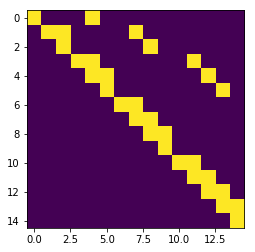

In [12]:
plt.imshow(np.absolute(coef)>1E-6)
plt.show()

In [13]:
print(coef)

[[0.03       0.         0.         0.         0.00111056 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.01       0.00111056 0.         0.         0.
  0.         0.00044422 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.01       0.         0.         0.
  0.         0.         0.00044422 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.006      0.00044422 0.
  0.         0.         0.         0.         0.         0.00028557
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.00333333 0.00044422
  0.         0.         0.         0.         0.         0.
  0.00017769 0.         0.        ]
 [0.         0.         0.         0.         0.         0.006
  0.         0.         0.         0.         0.         0.
  0.         0.00028557 0.        ]
 [0.         0.         0.         0.        

In [14]:
# this is the actual A_ik matrix
A_ik = np.diag(1/gamma)@coef

In [15]:
print(A_ik)

[[3.00000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.11055542e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.00000000e-02 9.99499875e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.99799950e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.50000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.11055542e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.94000000e-01
  2.17668862e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.39929982e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  

We now find a numerical approximation of the ODE system according to Smith's (page 228) suggestion with $$\vec{M} = \big[\mu_M, 0, \sqrt{3}\sigma_M, \dots, 0\big]^T = \big[1, 0, \frac{1}{2}, \dots, 0\big]^T.$$ We use scipy.integrate.odeint.

In [16]:
t = np.linspace(1e-3, 2e1, 2e5)

M0 = np.zeros(K)
M0[0] = 1; M0[2] = 1/2

# dM/dt = A_ikM(t), M(0) = M0
def inv_growth(y, t, Q): return Q@y

In [17]:
Mt = spi.odeint(inv_growth, M0, t,  args = (A_ik,))

In [18]:
print(Mt.shape)

(200000, 15)


From equations 10.9 and 10.10, we note: $$\mathbb{E}\big(M^K(t, Q)\big) = M_0(t), \quad var\big(M^K(t, Q)\big) = \sum_{k=1}^K\big(M_0e^{r_kt}\big)^2\gamma_k$$

The graphs of the true and approximate means and the true and approximate $\pm2\sigma$ bands are presented below. Close examination reveals that the approximate mean closely tracks the true mean until about 15 years, or so, when the approximate mean begins to underestimate the true mean.

In [31]:
# variance vectors for graphing
approx_var = np.zeros(Mt.shape[0])

for i in range(Mt.shape[0]):
    for k in range(1, K):
        approx_var[i] += (Mt[i, 0]*Mt[i, k])*gamma[k]

In [20]:
print(approx_var.shape)

(200000,)


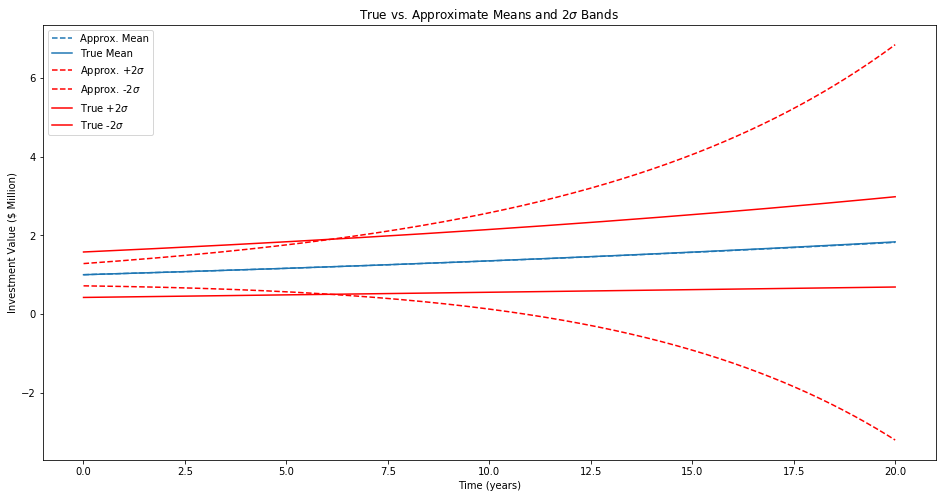

In [33]:
plt.figure(figsize = (16, 8))
plt.plot(t, Mt[:, 0], color = 'C0', linestyle = '--', label = 'Approx. Mean')
plt.plot(t, true_mean, color = 'C0', linestyle = '-', label = 'True Mean')
plt.plot(t, Mt[:, 0] + 2*np.sqrt(approx_var), color = 'r', linestyle = '--', label = 'Approx. +2$\sigma$')
plt.plot(t, Mt[:, 0] - 2*np.sqrt(approx_var), color = 'r', linestyle = '--', label = 'Approx. -2$\sigma$')
plt.plot(t, plus_2std, color = 'r', linestyle = '-', label = 'True +2$\sigma$')
plt.plot(t, minus_2std, color = 'r', linestyle = '-', label = 'True -2$\sigma$')
plt.legend()
plt.title('True vs. Approximate Means and 2$\sigma$ Bands')
plt.xlabel('Time (years)')
plt.ylabel('Investment Value ($ Million)')
plt.show()

### Spectral Collocation Solution

We repeat the initial value problem and the analytic solution:
<br>
<br>
$$\frac{dM}{dt} = M(t, \omega_1)r(t, \omega_2), \;M(0) = \mu_M,\quad M(t, Q) = \bigg(1 + \frac{1}{2}Q_1\bigg)e^{(0.03 + 0.01Q_2)t}.$$

Since we are working with Lagrange polynomials, we make use of the property: $L_k(q^m) = \delta_{km}$, and the Vandemonde matrix system is reduced to:

$$\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
\begin{bmatrix}
M_0(t) \\
\vdots \\
M_K(t)
\end{bmatrix}
=
\begin{bmatrix}
M(t, q^1) \\
\vdots \\
M(t, q^M)
\end{bmatrix}$$

The right-hand side of the matrix system is a vector of $5 \times 5$ collocation points, which we discuss next.

The prescribed collocation points are the first five Chebyshev nodes. Smith gives the following formula for generating the Chebyshev nodes (11.28, page 251): 

$$q^j = -cos\frac{\pi(j-1)}{M-1}, \quad j = 1, \dots, M+1.$$ 

Here, $M$ is the number of inputs, which in our problem is 5. Each variable's Chebyshev nodes is then transformed using the analytic solution, resulting in the $25 \times 1$ vector of collocation points on the right-hand side of the matrix system. That is, if $q_{i_j}$ is the $j^{th}$ node for variable $i$, then the vector of products will have the form 
$$\begin{bmatrix}
\big(1 + \frac{1}{2}q_{1_1}\big)exp\big\{(0.03 + 0.01q_{2_1})t\big\} \\
\big(1 + \frac{1}{2}q_{1_1}\big)exp\big\{(0.03 + 0.01q_{2_2})t\big\} \\
\big(1 + \frac{1}{2}q_{1_1}\big)exp\big\{(0.03 + 0.01q_{2_3})t\big\} \\
\vdots \\
\big(1 + \frac{1}{2}q_{5_5}\big)exp\big\{(0.03 + 0.01q_{5_4})t\big\} \\
\big(1 + \frac{1}{2}q_{5_5}\big)exp\big\{(0.03 + 0.01q_{5_5})t\big\}
\end{bmatrix}$$

Since we have the identity matrix on the left, we can simply write the approximation as: 

$$\begin{align*}
M(t) &= \bigg(1 + \frac{1}{2}q_{1_1}\bigg)e^{(0.03 + 0.01q_{2_1})t} + \cdots + \bigg(1 + \frac{1}{2}q_{5_5}\bigg)e^{(0.03 + 0.01q_{5_5})t} \\
\\
&= \sum_{i=1}^5 \sum_{j=1}^5 \bigg(1 + \frac{1}{2}q_{1_i}\bigg)e^{(0.03 + 0.01q_{2_j})t}
\end{align*}$$

In [2]:
# this function returns vector of transformed chebyshev nodes
def cheb_nodes(a, b, M):
    cheb = [(1/2)*(a+b) - (1/2)*(b-a)*np.cos(np.pi*(i-1)/(M-1)) for i in range(1, M+1)]
    return cheb

In [3]:
L = 5 

# create each variable's transformed nodes
cheb_M = cheb_nodes(0.5, 1.5, L)
cheb_r = cheb_nodes(0.02, 0.04, L)

# print(cheb_M)
# print(cheb_r)

# convert the transformed nodes using the analytic solution
cheb_vector = np.empty((0, 1))

for i in range(L):
    for j in range(L):
        out = cheb_M[i]*np.exp(cheb_r[j])  ## the exponential term should include a t
        cheb_vector = np.append(cheb_vector, out)

# print(cheb_vector)
# print(cheb_vector.shape)

We can produce the quadrature points and weights using a handy function provided in NumPy: numpy.polynomial.legendre.leggauss().

In [ ]:
coefn0 = np.zeros((K, K)) # initialize matrices

psi_n0 = legendre(0) # fix n = 0 for first term of matrix sum
for i1 in range(K): # indexing with i here to reflect the rows of [A_ik]
    psi_i1 = legendre(i1)
    for k in range(i1+1): # indexing with k here to reflect the columns of [A_ik]
        for i2 in range(k, -1, -1):
            psi_i2 = legendre(i2)
        psi_k1 = legendre(k)
        psi_k2 = legendre(i1-k)
        for r in range(R):
            coefn0[i, k] += rhoQ*(gl_weights[r]*psi_n0(gl_points[r])*psi_i1(gl_points[r])*psi_k1(gl_points[r]))*(gl_weights[r]*psi_n0(gl_points[r])*psi_i2(gl_points[r])*psi_k2(gl_points[r]))

In [ ]:
coefn1 = np.zeros((K, K)) # initialize matrices

psi_n1 = legendre(1) # fix n = 1 for second term of matrix sum
for i in range(K): # indexing with i here to reflect the rows of [A_ik]
    psi_i = legendre(i)
#     print('k', k)
    for k in range(i+1): # indexing with k here to reflect the columns of [A_ik]
        psi_k1 = legendre(k)
        psi_k2 = legendre(i-k)
#         print('i1', i, psi_i1)
#         print('i2', (k-i), psi_i2)
        for r in range(R):
            coefn0[i, k] += rhoQ*(gl_weights[r]*psi_n1(gl_points[r])*psi_i(gl_points[r])*psi_k1(gl_points[r]))*(gl_weights[r]*psi_n1(gl_points[r])*psi_i(gl_points[r])*psi_k2(gl_points[r]))